
# TMDb电影数据分析

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

TMDb电影数据集包括1万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括电影基本信息、用户评分和票房等信息。其中“演职人员 (cast)”、“电影类别 (genres)”等数据列包含由竖线字符（|）分隔的多个数值。
在这个项目中，我们将探索影响电影收益的因素有哪些，什么样的电影类型最受欢迎。

为了探索这两个问题，整个项目流程将被分为如下几部分：

1、数据整理：首先构建理想的数据框，并清洗数据。

2、利用describe函数和可视化的手段探索数据的全局特征，比如发行时间的分布、受欢迎程度的分布等。

3、对研究问题1进行探索，探索有哪些会影响电影收益。

4、对研究问题2进行探索，按照电影类型将数据集分类，探索分组特征。

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 务必包含一个‘magic word’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## 数据整理

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('tmdb-movies.csv')
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


观察到收益的的最小值、25分位值、中位数都是0，考虑到本研究会探索利益的影响因素，将revenue值为0的数据行删除。

将新的数据集命为df_new。

In [5]:
df_new = df[df['revenue']>0]
df_new.shape

(4850, 21)

将revenue值为0的行删除后，只有4850条数据。

然后，将genres一列的数据进行整理，将其分割成很多列，每一新列对应一种单一的类型，单元格的值将为True或False。

In [6]:
df_new['genres'].fillna('x', inplace = True)

c:\users\li rui\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


将电影类型破开，将多个电影类别的样本变成单个电影类型的多个样本。 比如, A电影是 a|b|c 类, 划分以后, A电影就变成a类、b类、c类三个样本。

In [7]:
df_genres = df_new['genres'].str.split('|', expand=True).stack() \
                        .reset_index(level=0).set_index('level_0') \
                        .rename(columns={0:'genres'}).join(df_new.drop('genres', axis=1))

看一下破开电影类型的数据。

In [8]:
df_genres.head()

,genres,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,keywords,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Action,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,Adventure,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,Science Fiction,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,Thriller,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Action,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


提取此次数据分析关注的变量，包括受欢迎程度、收益、电影时长、投票人数、得分、发行年份等信息。

In [9]:
df_new[['popularity','revenue','runtime','vote_count','vote_average','release_year']].describe()

,popularity,revenue,runtime,vote_count,vote_average,release_year
count,4850.000000,4.850000e+03,4850.000000,4850.000000,4850.000000,4850.000000
mean,1.045109,8.922066e+07,107.964742,436.215876,6.148763,2000.921649
std,1.356628,1.620684e+08,21.112847,806.416200,0.798795,11.569192
min,0.001117,2.000000e+00,15.000000,10.000000,2.100000,1960.000000
25%,0.387754,7.708081e+06,95.000000,46.000000,5.600000,1994.000000
50%,0.680289,3.182654e+07,104.000000,147.000000,6.200000,2004.000000
75%,1.210457,9.991823e+07,117.000000,435.000000,6.700000,2010.000000
max,32.985763,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000


<a id='wrangling'></a>
## 数据可视化

第一，观察下电影发行数量随着时代发展的变化。

Text(0.5,0,'release year')

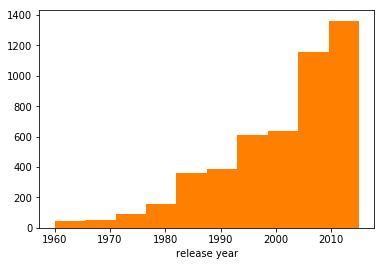

In [10]:
plt.hist(df_new['release_year'], color = '#FF7F00')
plt.xlabel("release year")

可以看到，电影发行量随着时间的推进递增，2005年前后，出现爆发式增长。

第二，看一下评分的分布。

Text(0.5,0,'vote_score distribution')

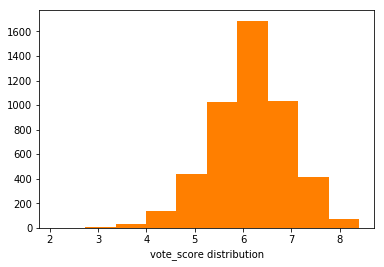

In [11]:
plt.hist(df_new['vote_average'], bins = 10, color = '#FF7F00')
plt.xlabel("vote_score distribution")

可以看到，大多出电影的评分分布在5-7分，位于6分左右的最多。

第三，看一下电影时长的分布。

Text(0.5,0,'runtime distribution')

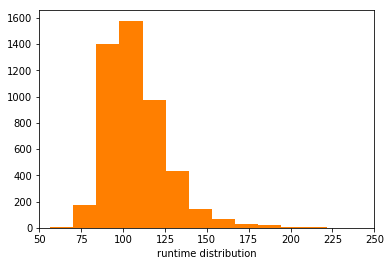

In [12]:
plt.hist(df_new['runtime'], bins = 50, color = '#FF7F00')
plt.xlim(50,250)
plt.xlabel('runtime distribution')

电影时长位于100分钟左右的电影占了大多数，只有极少的电影时长超过了150分钟。

第四，看一下电影收益的分布。

Text(0.5,0,'revenue distribution')

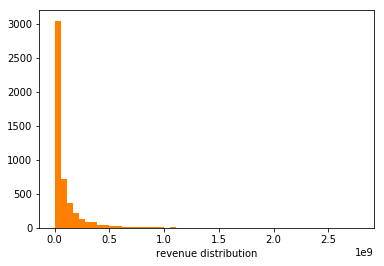

In [13]:
plt.hist(df_new['revenue'], bins = 50, color = '#FF7F00')
plt.xlabel('revenue distribution')

电影收益的分布是典型的长尾分布，大多数电影收益小于5亿，只有极少部分收益大于5亿。

<a id='wrangling'></a>
## 研究问题1：影响电影收益的因素

第一，看一下电影收益随着电影发行年份的变化。

Text(0,0.5,'revenue')

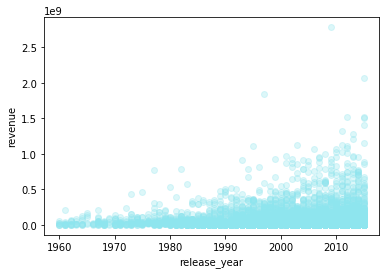

In [14]:
plt.scatter(df_new['release_year'], df_new['revenue'], alpha=0.3,color = '#8EE5EE')
plt.xlabel('release_year')
plt.ylabel('revenue')

可以看到，电影收益随着时代的发展递增，在2010年的左右发布的一部电影收益最高。

第二，看一下电影收益与用户评分的关系。

Text(0,0.5,'revenue')

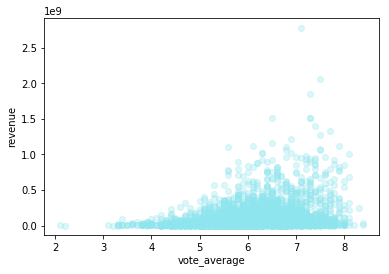

In [15]:
plt.scatter(df_new['vote_average'], df_new['revenue'],alpha = 0.3,color = '#8EE5EE')
plt.xlabel('vote_average')
plt.ylabel('revenue')

整体上，评分越高，电影收益越高，但是一些评分超过8分的电影，收益却很低。

第三，看一下用户评分数与电影收益的关系。

Text(0,0.5,'revenue')

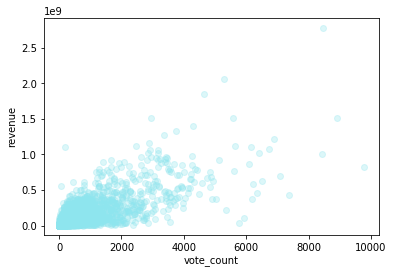

In [16]:
plt.scatter(df_new['vote_count'], df_new['revenue'], alpha = 0.3,color = '#8EE5EE')
plt.xlabel('vote_count')
plt.ylabel('revenue')

整体上，参与评分的用户越多，电影收益越高。

第四，看一下电影受欢迎程度与电影收益的关系。

Text(0,0.5,'revenue')

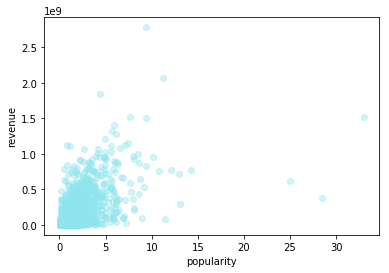

In [17]:
plt.scatter(df_new['popularity'], df_new['revenue'], alpha = 0.4,color = '#8EE5EE')
plt.xlabel('popularity')
plt.ylabel('revenue')

可以看到，电影受欢迎程度越高，收益越高。此外，这个图形分布和revenue-vote_count的图形分布很像，接下来看一下电影受欢迎程度和参与投票的用户的分布关系。

Text(0,0.5,'vote_count')

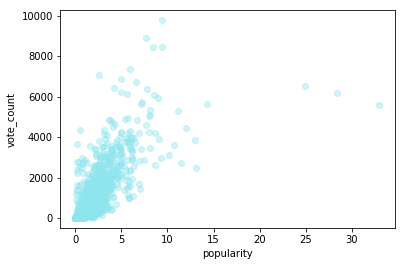

In [18]:
plt.scatter(df_new['popularity'], df_new['vote_count'], alpha = 0.4,color = '#8EE5EE')
plt.xlabel('popularity')
plt.ylabel('vote_count')

可以看出，电影受欢迎程度越高，参与投票的用户数也就越多。

<a id='wrangling'></a>
## 寻找特殊点

接下来，看一下评分较高、收益较高、得到投票数最多的电影的基本信息。

评分大于8分电影的基本信息。

In [19]:
df_new[df_new['vote_average'] > 8][['original_title','revenue','genres','release_year','vote_average','popularity']]

,original_title,revenue,genres,release_year,vote_average,popularity
650,Whiplash,13993093,Drama|Music,2014,8.2,4.780419
2389,Bill Cunningham New York,1339650,Documentary,2010,8.1,0.052322
2409,Fight Club,100853753,Drama,1999,8.1,8.947905
2875,The Dark Knight,1001921825,Drama|Action|Crime|Thriller,2008,8.1,8.466668
4177,Pulp Fiction,213928762,Thriller|Crime,1994,8.1,8.093754
4178,The Shawshank Redemption,28341469,Drama|Crime,1994,8.4,7.192039
4179,Forrest Gump,677945399,Comedy|Drama|Romance,1994,8.1,6.715966
7269,The Godfather,245066411,Drama|Crime,1972,8.3,5.738034
7948,Stop Making Sense,4978922,Documentary|Music,1984,8.4,0.283191
9758,The Godfather: Part II,47542841,Drama|Crime,1974,8.1,3.264571


收益大于20亿的电影。

In [20]:
df_new[df_new['revenue'] > 2.0*1e9][['original_title','revenue','genres','release_year','vote_average','popularity']]

,original_title,revenue,genres,release_year,vote_average,popularity
3,Star Wars: The Force Awakens,2068178225,Action|Adventure|Science Fiction|Fantasy,2015,7.5,11.173104
1386,Avatar,2781505847,Action|Adventure|Fantasy|Science Fiction,2009,7.1,9.432768


得到投票数最多的电影。

In [21]:
df_new[df_new['vote_count'] == df_new['vote_count'].max() ][['original_title','revenue','genres','release_year','vote_average','popularity']]

,original_title,revenue,genres,release_year,vote_average,popularity
1919,Inception,825500000,Action|Thriller|Science Fiction|Mystery|Adventure,2010,7.9,9.363643


<a id='wrangling'></a>
## 研究问题2：电影类型对受欢迎程度、电影收益的影响

第一，将电影按照类型做划分，查看每种类型的电影数量。

In [22]:
df_genres['genres'].value_counts()

Drama              2275
Comedy             1771
Thriller           1424
Action             1261
Romance             877
Adventure           843
Crime               774
Science Fiction     587
Horror              561
Family              513
Fantasy             461
Mystery             410
Animation           237
Music               186
History             153
War                 137
Documentary         102
Western              65
Foreign              31
TV Movie              1
Name: genres, dtype: int64

可以看出，Drama、Comedy、Thriller类型是电影类型前三甲，Western、Foreign、TV Movie的类型的电影是最少的三种类型,TV Movie仅有一部。

第二，看各类型电影平均收益的分布。

Text(0,0.5,'revenue')

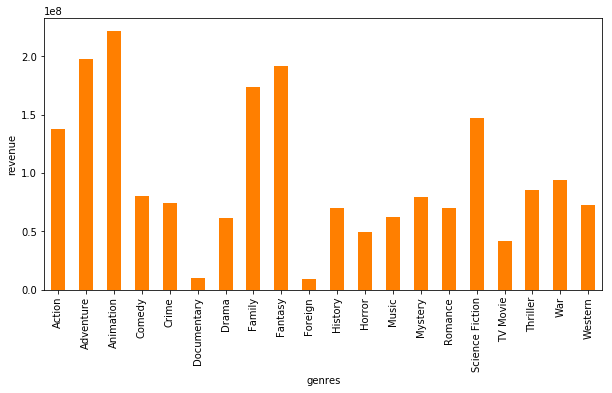

In [23]:
df_genres.groupby('genres')['revenue'].mean().plot(kind='bar', color='#FF7F00', figsize=(10, 5))
plt.xlabel('genres')
plt.ylabel('revenue')  

可以看出，Animation、Adventure、Fantasy类型的电影是平均收益前三甲，Animation类型的电影平均收益超过20亿，接下来是Family、Science Fiction、Action类型，Documentary、Foreign和TV Movie是平均收益最低的三种类型。

第三，探索电影类型与受欢迎程度的关系。

Text(0,0.5,'popularity')

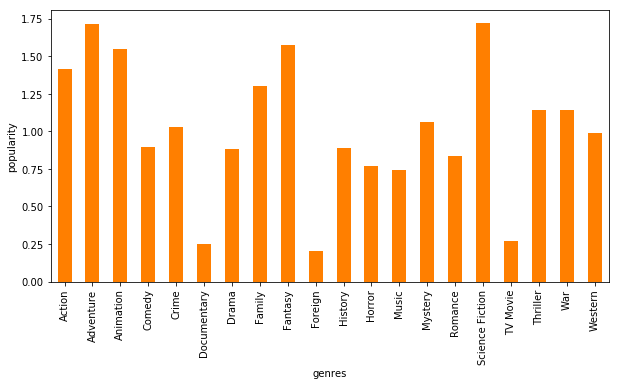

In [24]:
df_genres.groupby('genres')['popularity'].mean().plot(kind='bar', color='#FF7F00', figsize=(10, 5))
plt.xlabel('genres')
plt.ylabel('popularity')

可以看出，Adventure、Science Fiction、Fantasy类型的电影是最受欢迎前三甲，TV Movie、Foreign、Documentary是最不受欢迎的三种类型。

<a id='conclusions'></a>
## 结论

需要说明的是，本项目探索过程存在很大的局限性。首先，用10000余条数据探索时间跨度为50多年的电影相关的发展的数据量并不是非常大，而且在整理过程中,发现revenue值为0的数据非常多，超过总数的一半，这些数据是没有意义的，故删除，有用的数据仅剩4850条，数据量更小了。其次，在探索电影收益的影响因素时，我们并没有对所有因素进行研究，所以得出的结论具有局限性。最后，在数据整理的过程中，所采用的方法可能会对探索的结论有所影响。以下，是在如上局限性的前提下，针对研究问题，得出的一些结论。


1、针对研究问题1，整体而言，电影收益随着年代的递增而增加，随着评分的递增而递增，随着受欢迎程度和用户投票数的增加而增加（受欢迎程度与用户投票数息息相关），结合研究问题2，Animation、Adventure、Fantasy类型的电影是平均收益前三甲。

2、针对研究问题2，Drama、Comedy、Thriller类型是电影数量前三甲，Western、Foreign、TV Movie类型的电影是最少的三种类型，TV Movie仅有1部。

3、针对研究问题2，Animation、Adventure、Fantasy类型的电影是平均收益前三甲，接下来是Family、Science Fiction、Action类型，Documentary、Foreign和TV Movie是平均收益最低的三种类型。

4、针对研究问题2，Adventure、Science Fiction、Fantasy类型的电影是最受欢迎前三甲，TV Movie、Foreign、Documentary是最不受欢迎的三种类型。

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295